In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [2]:
class OneLayerNetwork(torch.nn.Module):
    # Implement OneLayerNetwork with torch.nn.Linear
    def __init__(self):
        super(OneLayerNetwork, self).__init__()
        self.linear = torch.nn.Linear(784, 3)
    
    # Implement the foward function
    def forward(self, x):
        # x.shape = (n_batch, n_features)
        outputs = self.linear(x)
        return outputs

In [3]:
class TwoLayerNetwork(torch.nn.Module):
    # Implement TwoLayerNetwork with torch.nn.Linear
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        self.linear_one = torch.nn.Linear(784, 400)
        self.linear_two = torch.nn.Linear(400, 3)
    
    # Implement the foward function
    def forward(self, x):
        # x.shape = (n_batch, n_features)
        outputs = self.linear_two(torch.sigmoid(self.linear_one(x)))
        return outputs

In [4]:
# Load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [5]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [6]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [7]:
def train(model, criterion, optimizer, train_loader, valid_loader):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, 31):
        model.train()
        for batch_X, batch_y in train_loader:
            # Implement the training process
            optimizer.zero_grad()   # Zeroes the gradient buffers
            output = model(batch_X)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()    # Does the update
            
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

In [8]:
# Fix random seed
np.random.seed(0)
torch.manual_seed(0)

# Load data with correct file path
# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data("./hw3_train.csv")
X_valid, y_valid = load_data("./hw3_valid.csv")
X_test, y_test = load_data("./hw3_test.csv")

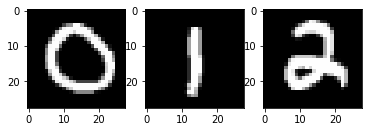

In [9]:
# Print out differnt training image categories
fig, axs = plt.subplots(1, 3)
idxs = [1, 4, 7]

for k, idx in enumerate(idxs):
    x = X_train[idx].reshape(28, 28)
    img = Image.fromarray(x*255)
    axs[k].imshow(img)

In [10]:
# Convert numpy arrays to tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_valid = torch.tensor(X_valid)
y_valid = torch.tensor(y_valid)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

# Prepare dataloaders for training, validation, and testing
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid, y_valid), batch_size=10)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=10)

In [11]:
# Prepare OneLayerNetwork, criterion, and optimizer
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)

print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
print("Done!")

Start training OneLayerNetwork...
| epoch  1 | train loss 0.700347 | train acc 0.880000 | valid loss 0.713287 | valid acc 0.846667 |
| epoch  2 | train loss 0.480803 | train acc 0.946667 | valid loss 0.501334 | valid acc 0.886667 |
| epoch  3 | train loss 0.363843 | train acc 0.963333 | valid loss 0.386324 | valid acc 0.933333 |
| epoch  4 | train loss 0.293254 | train acc 0.976667 | valid loss 0.317292 | valid acc 0.933333 |
| epoch  5 | train loss 0.247652 | train acc 0.973333 | valid loss 0.274081 | valid acc 0.940000 |
| epoch  6 | train loss 0.215023 | train acc 0.976667 | valid loss 0.242991 | valid acc 0.946667 |
| epoch  7 | train loss 0.189971 | train acc 0.980000 | valid loss 0.218144 | valid acc 0.946667 |
| epoch  8 | train loss 0.170612 | train acc 0.980000 | valid loss 0.199352 | valid acc 0.960000 |
| epoch  9 | train loss 0.155022 | train acc 0.980000 | valid loss 0.185477 | valid acc 0.960000 |
| epoch 10 | train loss 0.142299 | train acc 0.986667 | valid loss 0.173548

In [12]:
# Prepare TwoLayerNetwork, criterion, and optimizer
model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
print("Done!")

Start training TwoLayerNetwork...
| epoch  1 | train loss 0.511130 | train acc 0.960000 | valid loss 0.512690 | valid acc 0.946667 |
| epoch  2 | train loss 0.287856 | train acc 0.973333 | valid loss 0.303268 | valid acc 0.940000 |
| epoch  3 | train loss 0.187138 | train acc 0.980000 | valid loss 0.208556 | valid acc 0.953333 |
| epoch  4 | train loss 0.135167 | train acc 0.980000 | valid loss 0.165074 | valid acc 0.966667 |
| epoch  5 | train loss 0.102639 | train acc 0.986667 | valid loss 0.138180 | valid acc 0.966667 |
| epoch  6 | train loss 0.081466 | train acc 0.986667 | valid loss 0.121921 | valid acc 0.966667 |
| epoch  7 | train loss 0.065561 | train acc 0.996667 | valid loss 0.109645 | valid acc 0.973333 |
| epoch  8 | train loss 0.055585 | train acc 0.996667 | valid loss 0.098795 | valid acc 0.973333 |
| epoch  9 | train loss 0.045601 | train acc 1.000000 | valid loss 0.092296 | valid acc 0.980000 |
| epoch 10 | train loss 0.038005 | train acc 1.000000 | valid loss 0.088600

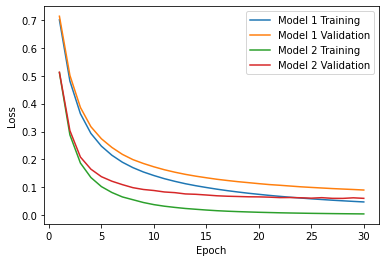

In [13]:
one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

# Generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
x = np.arange(1,31)
plt.plot(x, one_train_loss, label='Model 1 Training')
plt.plot(x, one_valid_loss, label='Model 1 Validation')
plt.plot(x, two_train_loss, label='Model 2 Training')
plt.plot(x, two_valid_loss, label='Model 2 Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

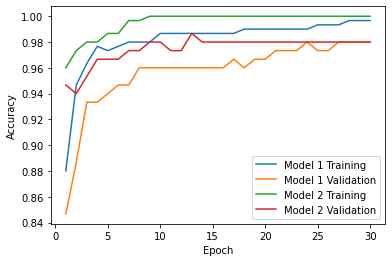

In [14]:
# Generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
x = np.arange(1,31)
plt.plot(x, one_train_acc, label='Model 1 Training')
plt.plot(x, one_valid_acc, label='Model 1 Validation')
plt.plot(x, two_train_acc, label='Model 2 Training')
plt.plot(x, two_valid_acc, label='Model 2 Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Calculate the test accuracy
y_acc_one = evaluate_acc(model_one, test_loader)
print('Model one test accuracy: ', y_acc_one.item())
y_acc_two = evaluate_acc(model_two, test_loader)
print('Model two test accuracy: ', y_acc_two.item())

Model one test accuracy:  0.9666666388511658
Model two test accuracy:  0.9666666388511658
